#1. Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Define paths:
pathtoResults = r'/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Models_performance/SVM/Strategic_sophistication/'

#2. Load saved performance results


In [14]:
# Read validation results:
cr_val = pd.read_csv (pathtoResults + 'classification_report_val.csv')
roc_val = pd.read_csv (pathtoResults + 'roc_report_val.csv')

In [15]:
# Read test percentage results:
cr_full = pd.read_csv (pathtoResults + 'classification_report_full_test.csv')
roc_full = pd.read_csv (pathtoResults + 'roc_report_test_full.csv')

cr_80 = pd.read_csv (pathtoResults + 'classification_report_80_test.csv')
roc_80 = pd.read_csv (pathtoResults + 'roc_report_test_80.csv')

cr_50 = pd.read_csv (pathtoResults + 'classification_report_50_test.csv')
roc_50 = pd.read_csv (pathtoResults + 'roc_report_test_50.csv')

cr_30 = pd.read_csv (pathtoResults + 'classification_report_30_test.csv')
roc_30 = pd.read_csv (pathtoResults + 'roc_report_test_30.csv')

cr_15 = pd.read_csv (pathtoResults + 'classification_report_15_test.csv')
roc_15 = pd.read_csv (pathtoResults + 'roc_report_test_15.csv')


In [16]:
# Load mapk results:
mapk_val = pd.read_csv (pathtoResults + 'mapk_val.csv')
mapk_timings = pd.read_csv (pathtoResults + 'mapk_timings.csv')
mapk_percentages = pd.read_csv (pathtoResults + 'mapk_percentages.csv')

In [17]:
results_percentage = {'dataset':  ['val', 'full', '80', '50', '30', '15'],
        'accuracy': [cr_val.iloc[3,1], cr_full.iloc[3,1], cr_80.iloc[3,1], cr_50.iloc[3,1], cr_30.iloc[3,1], cr_15.iloc[3,1]],
        'auc': [roc_val.iloc[0, 2], roc_full.iloc[0, 2], roc_80.iloc[0, 2], roc_50.iloc[0, 2], roc_30.iloc[0, 2], roc_15.iloc[0, 2]],
        'precision': [cr_val.iloc[5,1], cr_full.iloc[5,1], cr_80.iloc[5,1], cr_50.iloc[5,1], cr_30.iloc[5,1], cr_15.iloc[5,1]],
        'f1macro': [cr_val.iloc[4,3], cr_full.iloc[4,3], cr_80.iloc[4,3], cr_50.iloc[4,3], cr_30.iloc[4,3], cr_15.iloc[4,3]],
        'f1weighted': [cr_val.iloc[5,3], cr_full.iloc[5,3], cr_80.iloc[5,3], cr_50.iloc[5,3], cr_30.iloc[5,3], cr_15.iloc[5,3]],
        }

results_percentage = pd.DataFrame(results_percentage)

In [18]:
percentage_csv_results = results_percentage.to_csv(pathtoResults + 'results_percentage.csv', index= True)

In [19]:
# Load timing data:
cr_2s = pd.read_csv (pathtoResults + 'classification_report_2s_test.csv')
roc_2s = pd.read_csv (pathtoResults + 'roc_report_test_2s.csv')

cr_5s = pd.read_csv (pathtoResults + 'classification_report_5s_test.csv')
roc_5s = pd.read_csv (pathtoResults + 'roc_report_test_5s.csv')

cr_10s = pd.read_csv (pathtoResults + 'classification_report_10s_test.csv')
roc_10s = pd.read_csv (pathtoResults + 'roc_report_test_10s.csv')

cr_15s = pd.read_csv (pathtoResults + 'classification_report_15s_test.csv')
roc_15s = pd.read_csv (pathtoResults + 'roc_report_test_15s.csv')

In [20]:
results_timing = {'dataset':  ['val', 'full', '15s', '10s', '5s', '2s'],
        'accuracy': [cr_val.iloc[3,1], cr_full.iloc[3,1], cr_15s.iloc[3,1], cr_10s.iloc[3,1], cr_5s.iloc[3,1], cr_2s.iloc[3,1]],
        'auc': [roc_val.iloc[0, 2], roc_full.iloc[0, 2], roc_15s.iloc[0, 2], roc_10s.iloc[0, 2], roc_5s.iloc[0, 2], roc_2s.iloc[0, 2]],
        'precision': [cr_val.iloc[5,1], cr_full.iloc[5,1], cr_15s.iloc[5,1], cr_10s.iloc[5,1], cr_5s.iloc[5,1], cr_2s.iloc[5,1]],
        'f1macro': [cr_val.iloc[4,3], cr_full.iloc[4,3], cr_15s.iloc[4,3], cr_10s.iloc[4,3], cr_5s.iloc[4,3], cr_2s.iloc[4,3]],
        'f1weighted': [cr_val.iloc[5,3], cr_full.iloc[5,3], cr_15s.iloc[5,3], cr_10s.iloc[5,3], cr_5s.iloc[5,3], cr_2s.iloc[5,3]],
        }

results_timing = pd.DataFrame(results_timing)

In [21]:
timing_csv_results = results_timing.to_csv(pathtoResults + 'results_timing.csv', index= True)

# 3. Plot results by timings and percentages

In [22]:
def plot_metrics(data1, data2, name_file):
  metrics = ['accuracy_timings', 'accuracy_percentages', 'auc_timings', 'auc_percentages', 'precision_timings', 'precision_percentages', 'f1macro_timings', 'f1macro_percentages', 'f1weighted_timings', 'f1weighted_percentages']
  fig, ax = plt.subplots(3,4, figsize=(30,20))
  fig.suptitle('SVM Strategic Sophistication Model Metric Plots',fontsize=40)
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    mtc = metric.split("_", 1)[0]
    plt.subplot(3,4,n+1)
    if n ==0:
      plt.plot(data1.iloc[:,0], data1[mtc], linewidth=3)
    elif n % 2 == 0:
      plt.plot(data1.iloc[:,0], data1[mtc], linewidth=3)
    else:
      plt.plot(data2.iloc[:,0], data2[mtc], linewidth=3)
    plt.xlabel('Dataset', fontsize=10)
    plt.title(str(name))
    plt.savefig(pathtoResults + name_file)


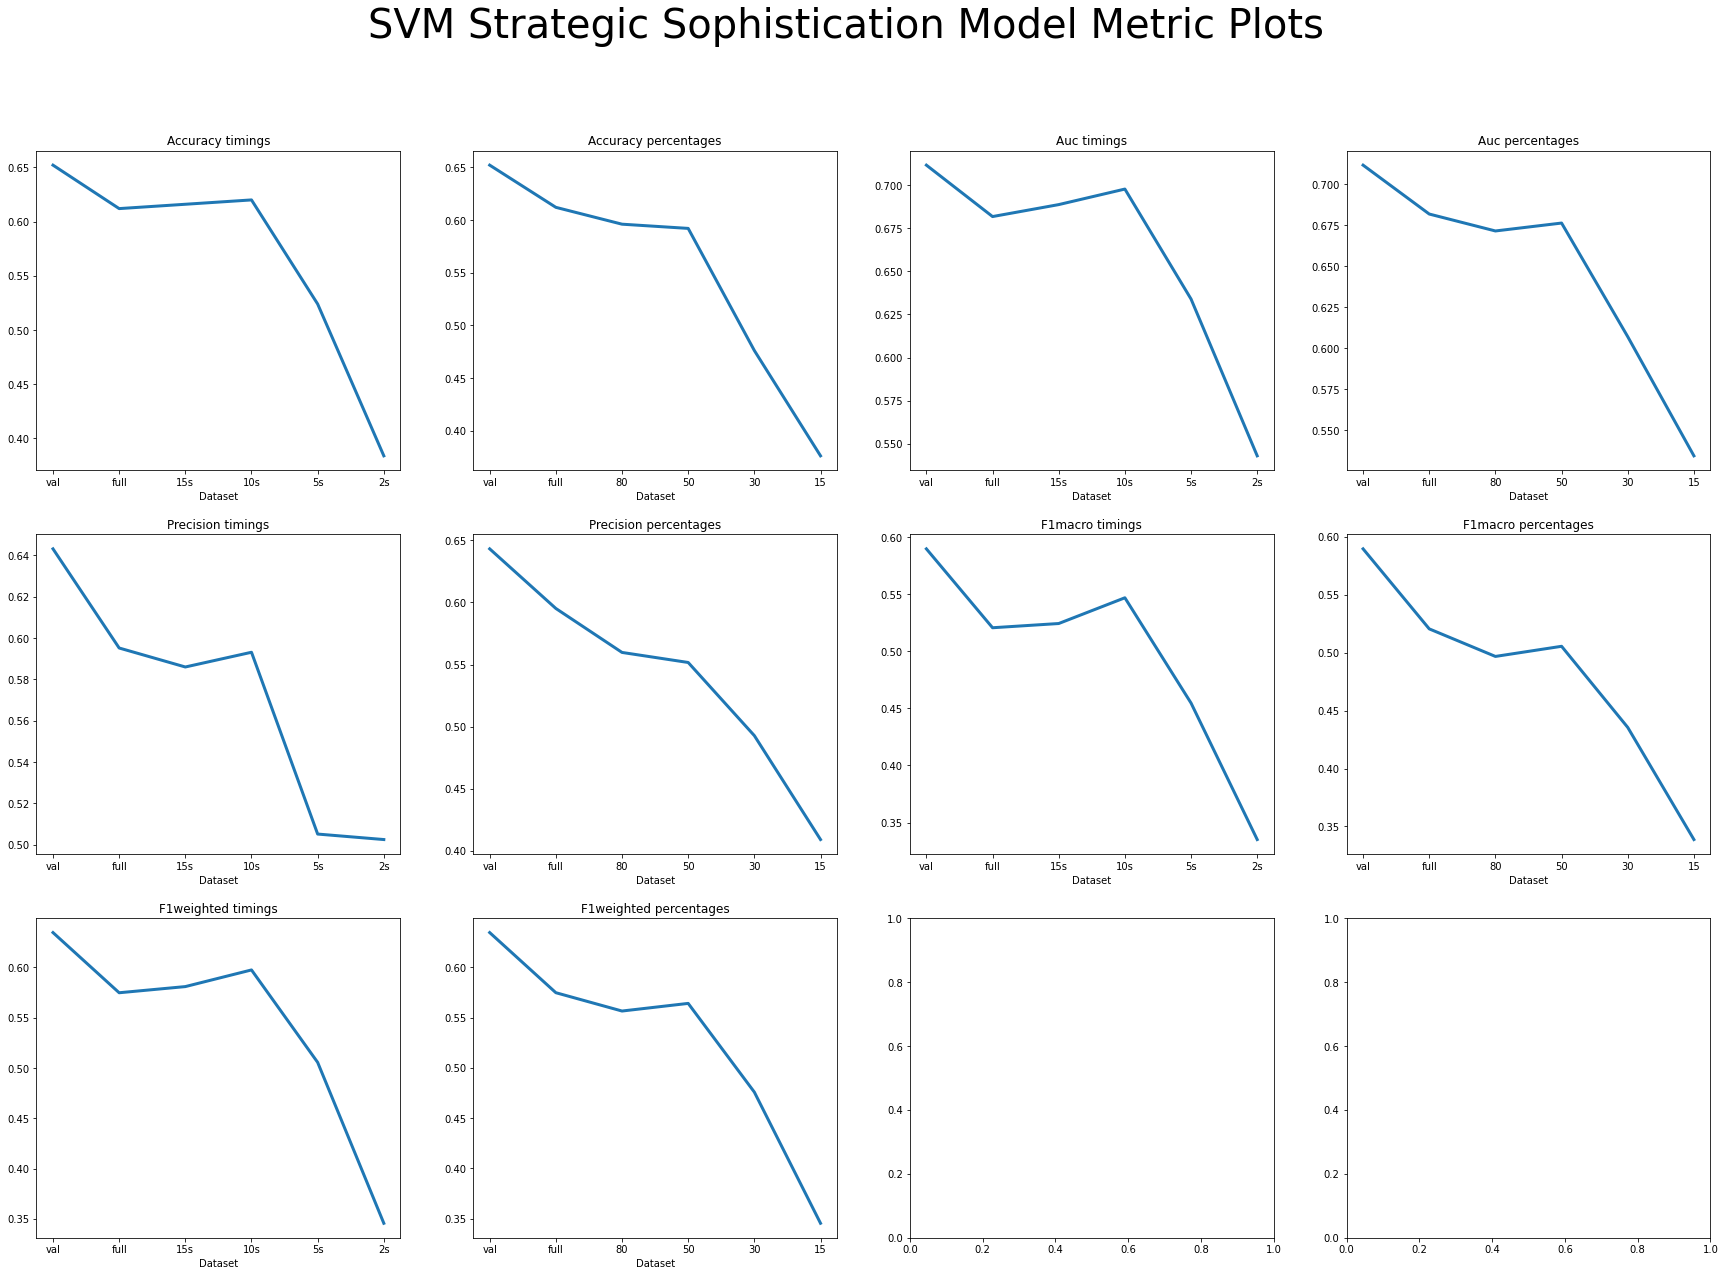

In [23]:
plot_metrics(results_timing, results_percentage, "results_SVM_strategic_sophistication.png")